In [1]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
from ekpy import control
from ekpy.control.instruments import keysightdsox3024a

In [2]:
rm = control.ResourceManager()
rm.list_resources()

('USB0::0x0957::0x17A6::MY63080078::INSTR',)

In [3]:
scope = rm.open_resource('USB0::0x0957::0x17A6::MY63080078::INSTR')

In [4]:
keysightdsox3024a.idn(scope)

'AGILENT TECHNOLOGIES,DSO-X 3024A,MY63080078,02.65.2021030741\n'

In [5]:
keysightdsox3024a.reset(scope)

In [6]:
scope.write(":AUToscale")

12

In [ ]:
keysightdsox3024a.setup(scope)

In [ ]:
bet = keysightdsox3024a.acquire()

In [5]:
scope.write("*CLS")
scope.write("*OPC")

6

In [ ]:
scope.write("chan1:rang 10")

In [ ]:
meows = scope.query("*STB?")
print(meows)

In [8]:
scope.write("*OPC?")

7

In [9]:
keysightdsox3024a.setup_wf(scope, source='CHAN1', byte_order='LSBF', format='WORD')

In [13]:
metadata, time, wfm = keysightdsox3024a.query_wf(scope, 'LSBF')

In [ ]:
keysightdsox3024a.setup_wf(scope, source='CHAN1', points='10000')
metadata_1, time_1, wfm_1 = keysightdsox3024a.query_wf(scope)
keysightdsox3024a.setup_wf(scope, source='CHAN2', points='10000')
metadata_2, time_2, wfm_2 = keysightdsox3024a.query_wf(scope)

In [14]:
print(len(time))
print(len(wfm))

1000
1000


In [16]:
print(metadata)

{'format': 1, 'type': 0, 'points': 1000, 'count': 1, 'x_increment': 2e-09, 'x_origin': -1e-06, 'x_reference': 0, 'y_increment': 7.851759e-05, 'y_origin': 0.0, 'y_reference': 0}


In [8]:
print(wfm)

[0.0, 0.0, 7.851758709875867e-05, 0.0, 7.851758709875867e-05, 0.0, 0.00015703517419751734, 0.0, 0.000235552761296276, 0.0, 0.000235552761296276, 0.0, 0.00031407034839503467, 0.0, 0.00031407034839503467, 0.0, 0.00031407034839503467, 0.0, 0.000471105522592552, 0.0, 0.000471105522592552, 0.0, 0.0005496231096913107, 0.0, 0.0006281406967900693, 0.0, 0.0006281406967900693, 0.0, 0.0007851758709875867, 0.0, 0.0007851758709875867, 0.0, 0.0007851758709875867, 0.0, 0.0007851758709875867, 0.0, 0.0007851758709875867, 0.0, 0.0008636934580863453, 0.0, 0.000942211045185104, 0.0, 0.0010207286322838627, 0.0, 0.0010207286322838627, 0.0, 0.0010207286322838627, 0.0, 0.00117776380648138, 0.0, 0.00117776380648138, 0.0, 0.0012562813935801387, 0.0, 0.0012562813935801387, 0.0, 0.0013347989806788974, 0.0, 0.001413316567777656, 0.0, 0.001413316567777656, 0.0, 0.001413316567777656, 0.0, 0.0014918341548764147, 0.0, 0.0015703517419751734, 0.0, 0.001648869329073932, 0.0, 0.001648869329073932, 0.0, 0.00172738691617269

In [ ]:
print(bet)

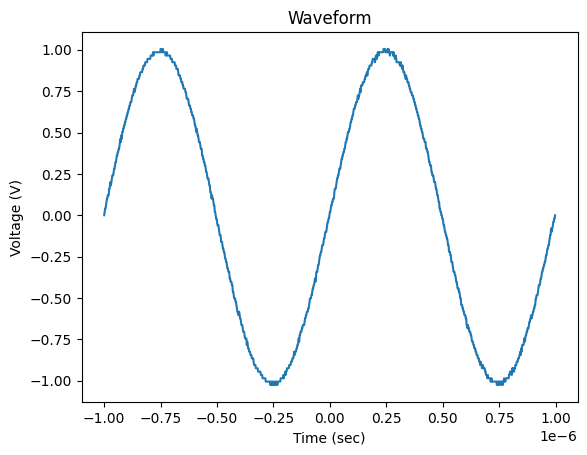

In [15]:
plt.plot(time, wfm)
plt.title('Waveform')
plt.xlabel('Time (sec)')
plt.ylabel('Voltage (V)')
plt.show()